### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

### Reading Data

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
df.loc[df["Age1stCode"] == "5 - 10 years", "Age1stCode"] = "05 - 10 years"
df.loc[df["Age1stCode"] == "Younger than 5 years", "Age1stCode"] = "00 - 05 years"

## 🤓 General Information

##### Number of (rows, columns)

In [4]:
df.shape

(83439, 48)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

## 🍼 Exploring Age1stCode column <br>
This column tells us that, at what age the user started coding.

In [6]:
df['Age1stCode'].value_counts()

11 - 17 years          44170
18 - 24 years          20065
05 - 10 years          11720
25 - 34 years           4199
35 - 44 years           1312
00 - 05 years            905
45 - 54 years            544
55 - 64 years            245
Older than 64 years       83
Name: Age1stCode, dtype: int64

There are total 9 age groups, ranging from 11-17 years to older than 64 years

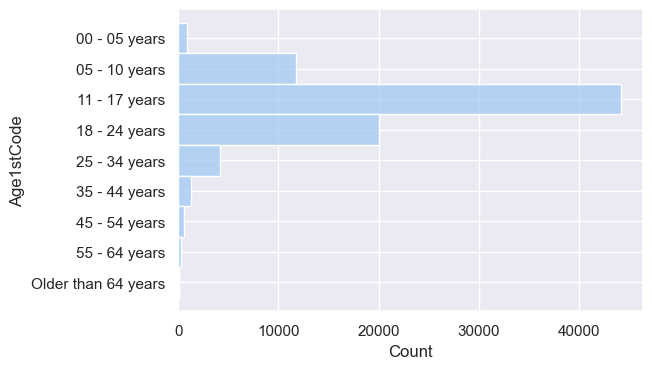

In [27]:
sns.set_palette("pastel")
df2 = df.sort_values("Age1stCode")
sns.histplot(data = df2, y = df2['Age1stCode'])
plt.rcParams["figure.figsize"] = (5,3)

#### Insights from Age1stCode Column 💡
* ##### As you can see, most of the Stack Overflow users started coding when they were between 11 to 17 years of age (including me 😬)
* ##### Interestingly, there are also a good chunk of kids (5 - 10 years) started coding really early 😳
* ##### And, there are also a handful of senior citizens (Older than 65 years) who started coding 🤦‍♂️ <br> IDK why the f they would do that, but yeah, it is what it is 😅


## 📚 Exploring Education Level column <br>
Thsi column tells us aabout the academic quailfication of the user

In [8]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          35357
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17512
Some college/university study without earning a degree                                10589
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2567
Primary/elementary school                                                              2479
Associate degree (A.A., A.S., etc.)                                                    2231
Something else                                                                         1601
Professional degree (JD, MD, etc.)                                                     1256
Name: EdLevel, dtype: int64

<Figure size 2400x1800 with 0 Axes>

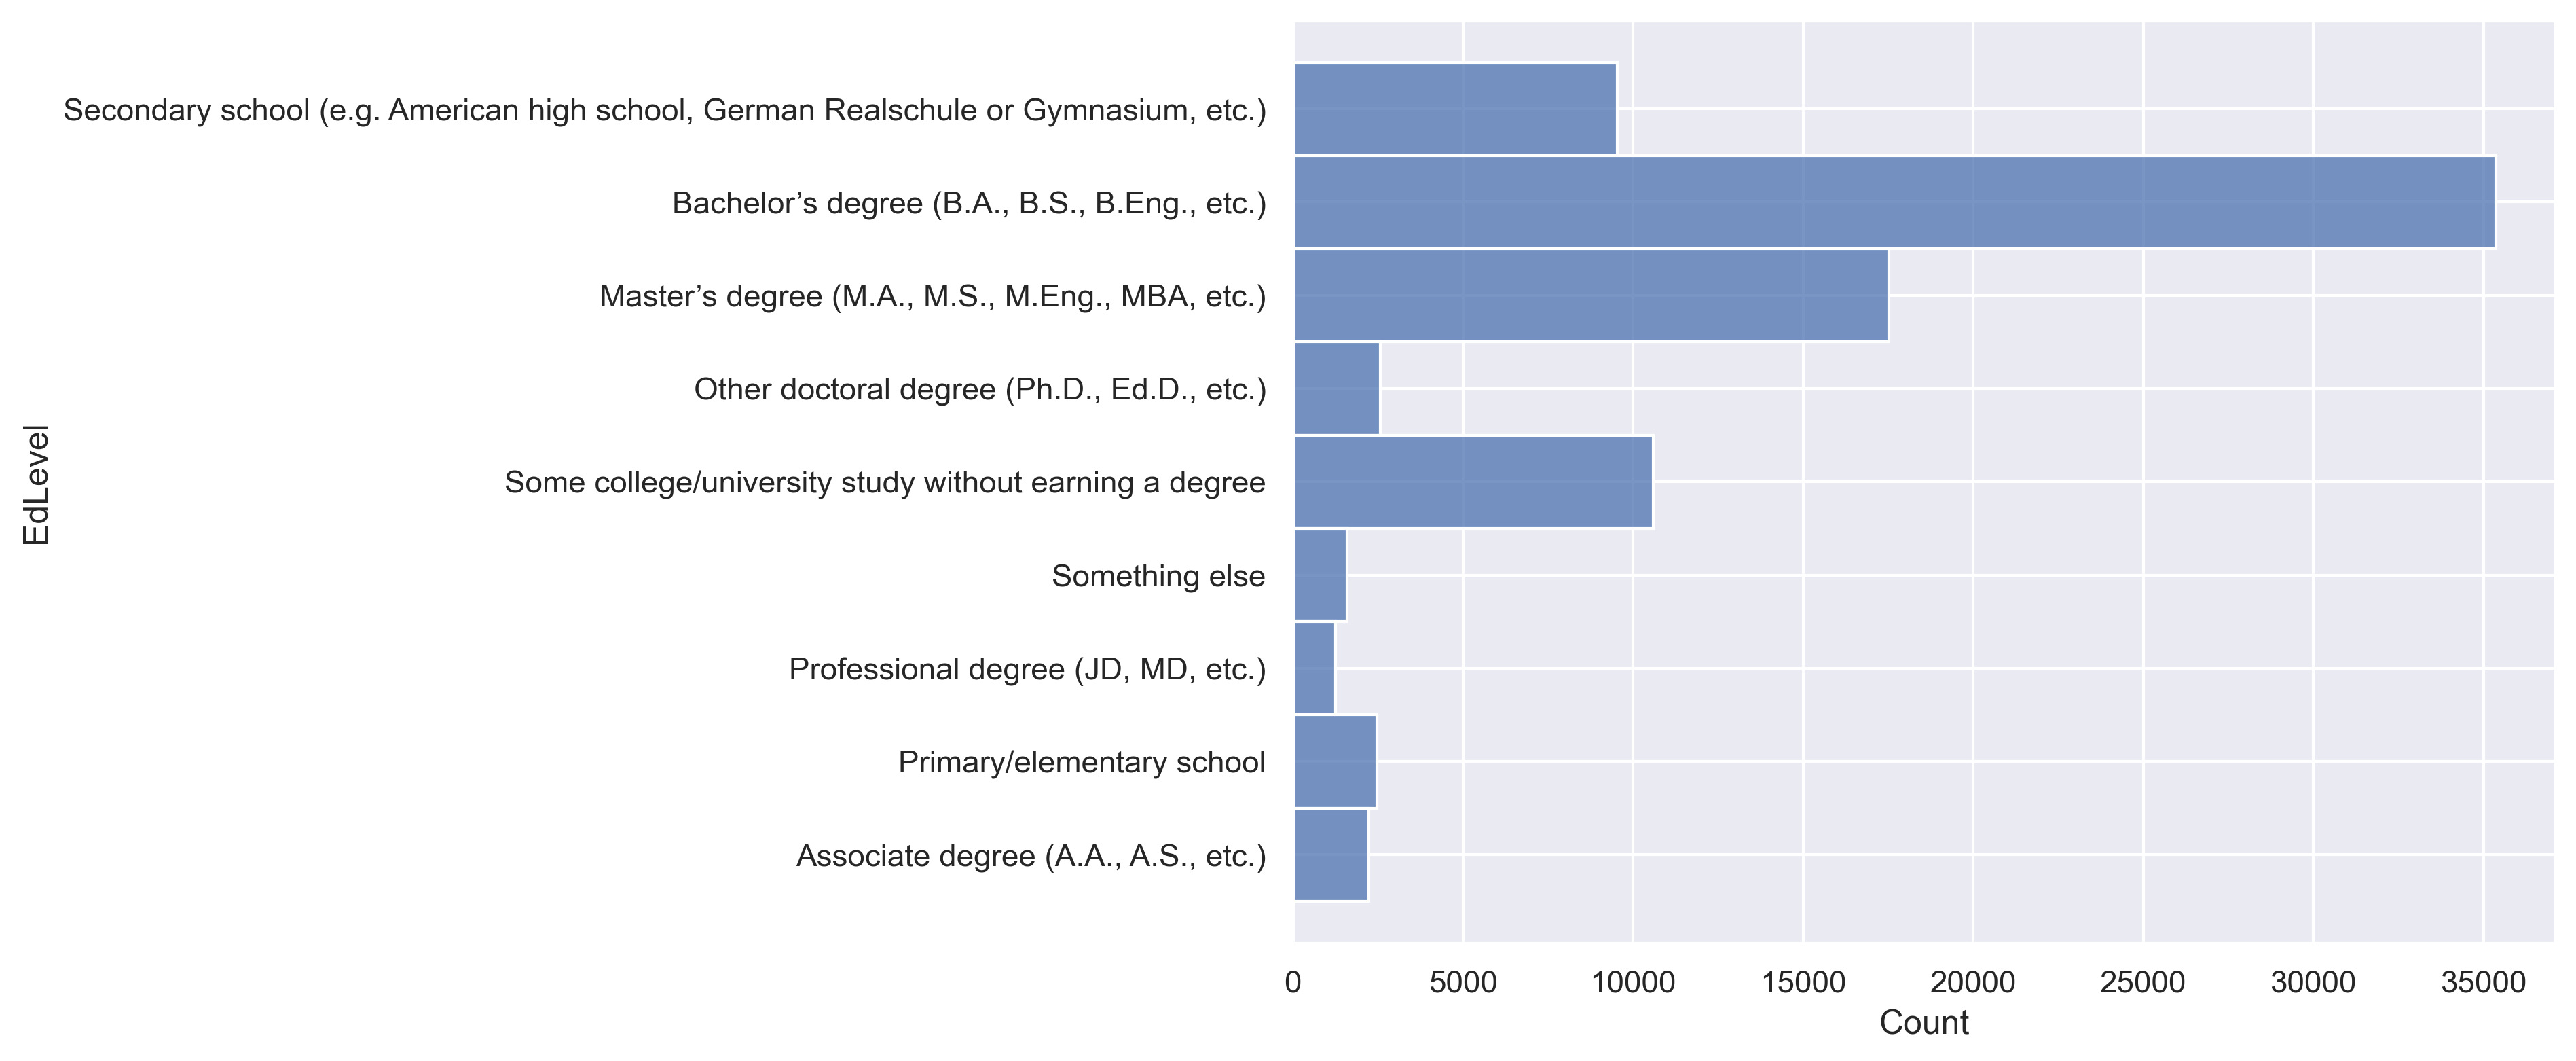

<Figure size 2400x1800 with 0 Axes>

In [18]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.histplot(data = df, y=df["EdLevel"])
figure(figsize=(8, 6))

#### Insights from EdLevel Column 💡
* ##### We can clearly see that more than 35000 Stack Overflow users are purseuing some sort of Bachelor’s degree 🎓
* ##### Shockingly, there are some 2400ish kids who use Stack Overflow, while in primary school 🤯
* ##### Also worth noting that, some 1200ish doctors and lawyers also use Stack Overflow 😳


In [33]:
df['OpSys'].unique()

array(['MacOS', 'Windows', 'Linux-based', 'BSD',
       'Other (please specify):', nan,
       'Windows Subsystem for Linux (WSL)'], dtype=object)

In [34]:
df['OpSys'].value_counts()

Windows                              37758
Linux-based                          21088
MacOS                                20984
Windows Subsystem for Linux (WSL)     2743
Other (please specify):                575
BSD                                    146
Name: OpSys, dtype: int64

In [36]:
df['NEWStuck'].unique()

array(['Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Google it',
       'Visit Stack Overflow;Google it',
       'Visit Stack Overflow;Google it;Watch help / tutorial videos;Do other work and come back later',
       ...,
       'Call a coworker or friend;Visit Stack Overflow;Google it;Do other work and come back later;Meditate;Play games;Visit another developer community (please name):;Other (please specify):',
       'Call a coworker or friend;Watch help / tutorial videos;Do other work and come back later;Panic;Visit another developer community (please name):',
       'Go for a walk or other physical activity;Google it;Watch help / tutorial videos;Do other work and come back later;Panic;Other (please specify):'],
      dtype=object)

In [37]:
df['NEWStuck'].value_counts()

Visit Stack Overflow;Google it                                                                                                                                               5094
Visit Stack Overflow;Google it;Watch help / tutorial videos                                                                                                                  4483
Google it                                                                                                                                                                    3404
Call a coworker or friend;Visit Stack Overflow;Google it                                                                                                                     2905
Visit Stack Overflow;Google it;Do other work and come back later                                                                                                             2703
                                                                                                              